In [6]:
# Instalar bibliotecas (se necessário)
#!pip install numpy pandas scikit-image matplotlib pillow opencv-python tensorflow

# Importar as bibliotecas
#import numpy as np
#import pandas as pd
#from skimage import io
#import matplotlib.pyplot as plt
#from PIL import Image
#import cv2
#import tensorflow as tf
#from tensorflow.keras.models import Sequential, load_model
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications import MobileNetV2

# Instalar bibliotecas (se necessário)
!pip install numpy pandas scikit-image matplotlib pillow opencv-python tensorflow

# Importar as bibliotecas
import os
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications import MobileNetV2



In [13]:
import zipfile

# Extrair o arquivo lfw.zip
zip_path = 'dataset/lfw.zip'
extract_path = 'dataset/lfw'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)




In [7]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Diretório onde as imagens estão armazenadas
data_dir = '/content/dataset/lfw/lfw-deepfunneled/lfw-deepfunneled'

# Lista para armazenar os rótulos e os caminhos das imagens
images = []
labels = []

# Loop através das pastas no diretório de dados
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            images.append(image_path)
            labels.append(folder_name)

# Converter as listas em um DataFrame
df = pd.DataFrame({'image_path': images, 'label': labels})

# Dividir os dados em conjuntos de treinamento e teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Salvar os conjuntos de treinamento e teste em arquivos CSV
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)


In [9]:
# Carregar os conjuntos de dados de treinamento e teste
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Configurar geradores de dados para treinamento e validação
batch_size = 10

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse'
)

# Carregar a arquitetura MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar as camadas base

# Obter os rótulos de treinamento
train_labels = train_generator.classes

# Adicionar camadas de classificação personalizadas
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x)

# Criar o modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando os geradores de dados
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Salvar o modelo treinado
model.save('face_classifier.h5')


Found 10586 validated image filenames belonging to 4911 classes.
Found 2647 validated image filenames belonging to 1713 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1241s 1s/step - accuracy: 0.0324 - loss: 8.9820 - val_accuracy: 0.0011 - val_loss: 8.5492
Epoch 2/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1232s 1s/step - accuracy: 0.0427 - loss: 8.2909 - val_accuracy: 0.0011 - val_loss: 8.5508
Epoch 3/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1202s 1s/step - accuracy: 0.0414 - loss: 8.1880 - val_accuracy: 0.0011 - val_loss: 8.5558
Epoch 4/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1206s 1s/step - accuracy: 0.0474 - loss: 8.1044 - val_accuracy: 0.0011 - val_loss: 8.5636
Epoch 5/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1213s 1s/step - accuracy: 0.0435 - loss: 8.0485 - val_accuracy: 0.0011 - val_loss: 8.5731
Epoch 6/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1183s 1s/step - accuracy: 0.0453 - loss: 7.9777 - val_accuracy: 0.0011 - val_loss: 8.5870
Epoch 7/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1202s 1s/step - accuracy: 0.0436 - loss: 7.9034 - val_accuracy: 0.0011 - val_loss: 8.6038
Epoch 8/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 1222s 1s/step - accuracy: 0.0425 - loss: 7.87

In [10]:
# Carregar o modelo de detecção de faces Haar Cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [12]:
def detect_and_recognize_faces(image_path):
    # Carregar a imagem
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detectar faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Carregar o classificador de faces
    classifier = load_model('face_classifier.h5')

    # Loop através das faces detectadas
    for (x, y, w, h) in faces:
        # Extrair a região da face
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))  # Redimensionar para o tamanho esperado pelo classificador

        # Preparar a imagem para a classificação
        face_array = image.img_to_array(face)
        face_array = np.expand_dims(face_array, axis=0)
        face_array /= 255.0  # Normalizar os valores dos pixels

        # Classificar a face
        prediction = classifier.predict(face_array)
        class_index = np.argmax(prediction, axis=1)
        class_label = train_df['label'].unique()
        class_name = class_label[class_index[0]]

        # Desenhar um retângulo ao redor da face e adicionar a classe prevista
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Mostrar a imagem com as detecções
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


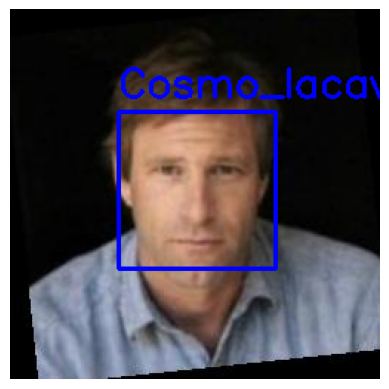

In [13]:
# Exemplo de uso da função
image_path = '/content/Aaron_Eckhart_0001.jpg'
detect_and_recognize_faces(image_path)